In [156]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.externals.joblib import Memory
from sklearn.datasets import load_svmlight_file
from sklearn.model_selection import train_test_split
mem = Memory("./mycache")

@mem.cache
def get_data():
    data = load_svmlight_file("D:/python/machine_learning/australian_scale")
    return data[0],data[1]
X,y=get_data()

In [157]:
w = np.zeros((15,))

In [158]:
w.T.shape

(15,)

In [159]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3)
a = np.ones((X_train.shape[0],1))
b = np.ones((X_test.shape[0],1))
X_train = np.column_stack((X_train.toarray(),a))
X_test = np.column_stack((X_test.toarray(),b))

In [161]:
X_train.shape

(483, 15)

In [162]:
X.shape

(690, 14)

In [166]:
rate=0.01
C=0.1

In [167]:
def loss_function(x,y,w):
    loss=0
    for i in range(x.shape[0]):
            loss+=max(0,1-y[i]*np.dot(w.T,x[i]))
    return 1/2*(np.dot(w,w.T))+(C/x.shape[0])*loss        

In [168]:
def descent_function(x,y,w):
    descent_temp=0
    for i in range(x.shape[0]):
        if(1-y[i]*np.dot(w.T,x[i])>=0):
            descent_temp+=-y[i]*x[i]
        else:
            descent_temp+=0
    return w+(C/x.shape[0])*descent_temp

In [169]:
loss_train=[]
loss_test=[]
for i in range(1000):
    descent=descent_function(X_train,y_train,w)
    w=w-rate*descent
    loss_train.append(loss_function(X_train,y_train,w))
    loss_test.append(loss_function(X_test,y_test,w))

In [170]:
print(np.array(loss_train).shape)

(1000,)


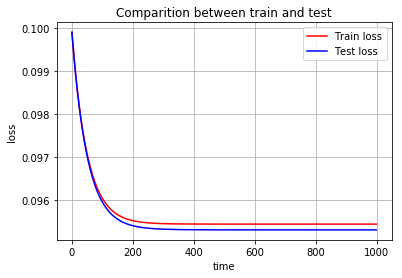

In [171]:
plt.title('Comparition between train and test')
plt.xlabel('time')
plt.ylabel('loss')
plt.plot(loss_train,label= "Train loss",color = 'red')
plt.plot(loss_test,label= "Test loss",color = 'blue')
plt.legend(loc='upper right')
plt.grid()
plt.show()